# KDE plot

As we saw in the previous section, when plotting a histogram with a small dataset, the appearance of the histpogram can be quite sensitive to aribtrary choices (such as the location of bin boundaries)

In the next section we meet a related plot, the Kernel Density Estimate plot, which can mitigate these limitations.

## Example

We will look at a small sample of height data for brother-sister pairs.

<img src= "https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/images/tallVshort.jpg" width="50%" />

### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas 
import seaborn as sns
sns.set_theme() # use pretty defaults

### Load and inspect the data

Load the file BrotherSisterData.csv which contains heights in cm for 25 brother-sister pairs

In [2]:
heightData = pandas.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/data/BrotherSisterData.csv')

### Add KDE to histogram 

Whist a histogram shows the number of observations in each of a set of discrete bins, the KDE plot estimates a smooth distribution shape that fits the underlying observations. 

You can think of it as the average of all the histograms you would get if you tried all the possible sets of bin boundaries (for a fixed bin width).

We can add a kde plot to the histogram by adding an extra <i>argument</i> to the function <tt>sns.histplot</tt>. Here we reproduce gthe two different histograms of brothers' heights with different bin boundaries, with the KDE plot added.

<ul>
    <li>Can you find the extra argument that adds the KDE plot?
    <li>Try to switch the KDE plot off!
</ul>

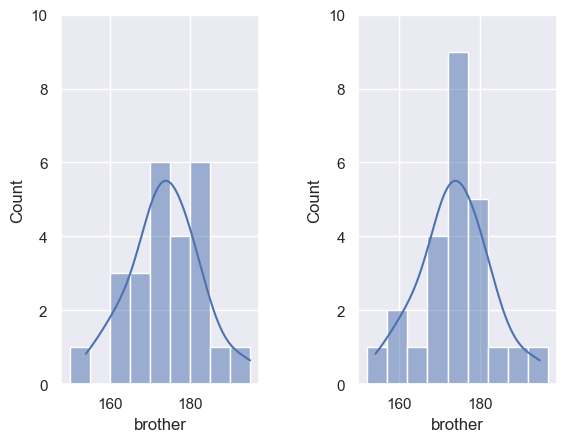

In [3]:
plt.subplot(1,2,1)
sns.histplot(heightData["brother"],  color='b', bins = range(150,200,5), kde="True")
plt.ylim((0,10))

plt.subplot(1,2,2)
sns.histplot(heightData["brother"],  color='b', bins = range(152,202,5), kde="True")
plt.ylim((0,10))

plt.subplots_adjust(wspace = 0.5) # shift the plots sideways so they don't overlap

Note that: 
<ul>
    <li>The histograms, which have different bin boundaries, look different
    <li>The KDE plot always looks the same.
</ul>

### KDE + rugplot

Arguably, the histograms are a bit misleading (given that the bin boundaries I happen to choose make such a difference).

Therefore I sometimes like to use the KDE plot without a histogram and instead display the individual data points as tick marks using <tt>sns.rugplot</tt>

Text(0.5, 0, 'Height')

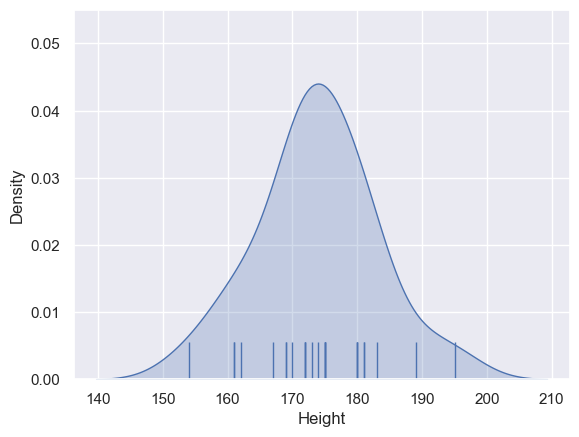

In [4]:
sns.kdeplot(heightData["brother"],  color='b', shade="True") # plot the KDE
sns.rugplot(heightData["brother"],  color='b', height=0.1) # plot individual datapoints as ticks on x axis
plt.xlabel('Height')

I like including the rugplot as it shows the reader how many datapoint the KDE was based on, and where they fell on the x-axis. For example, the KDE shows that the distribution is non-zero for people over 200cm, but the tallest person in our actual sample is 196cm.

#### Probability density

When we plot the KDE as a standalone (rather than over a histogram) the x-axis changes to 'Density' rather than 'count'. 

The values of density are such that the area under the curve of the KDE plot is 1. Technically it is a <i>probability density</i>. It means that probabilities could be read off the graph - so the probability of a member of our sample (one of the brothers) having a height between 160 and 170cm is the same as the area under the curve between 160 and 170cm.

<img src= "https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/images/densityFig.png" width="50%" />

One consequence of this is that you cannot tell from the KDE plot how many data points were in the dataset. That's a good reason to add a rugplot.

### Bandwidth

I said you can think of the KDE plot as a kind of average of all the histograms you would get if you tried all the possile locations for bin boundaries (150,155,160, vs 151,156,161 etc)

This is true but it only averages histograms for one possible bin <i>width</i>, which is chosen by the computer to give (generally) a good result.

You saw above that changing the bin width from 5cm to 1cm changed the balance between showing to overall shape of the distribution (where is the main peak) vs the details (details more visible with a small bin boundary).

Try adjusting the code below to draw the KDE plot with a narrower bandwidth (equivalent to narrower bins) and see what happens
<ul>
    <li> The argument <tt>bw_adjust</tt> is a scaling factor for the default bandwidth chosen by the computer.
    <li> If <tt>bw_adjust = 1.0</tt> the default bandwidth is used
    <li> If <tt>bw_adjust = 0.5</tt>, a narrower bandwith of half the default is used
    <li> If <tt>bw_adjust = 2.0</tt>, a wider bandwith of twice the default is used
</ul>
Try out some different values for <tt>bw_adjust</tt> to get a more detailed, or a smoother, KDE - you could try 1.0, 2.0, 0.5 and 0.1

<AxesSubplot:xlabel='brother', ylabel='Density'>

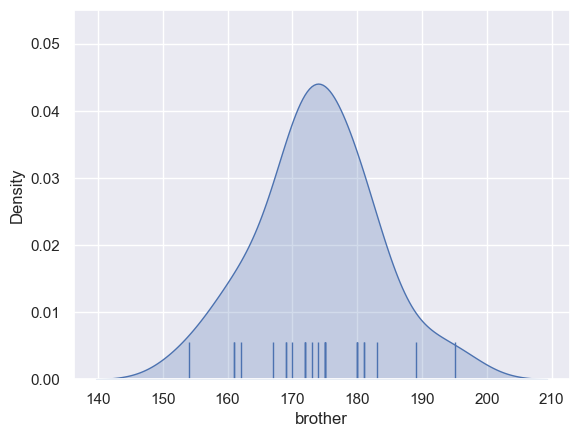

In [5]:
sns.kdeplot(heightData["brother"],  color='b', shade="True", bw_adjust=1.0) # plot the KDE
sns.rugplot(heightData["brother"],  color='b', height=0.1) # plot individual datapoints as ticks on x axis